In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [17]:
df = pd.read_csv('grapes_new.csv')
df

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,...,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE,CLASS
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,...,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,archean,High
1,112.57,elliptical,20.30,13.20,1.78,2.14,11.2,100,2.65,2.76,...,1.05,1050,23.40,51.91,31.28,99.05,7.66,48.18,archean,High
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,...,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,archean,High
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,...,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,alluvial,High
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,...,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,archean,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,102.34,elliptical,21.23,12.07,2.16,2.17,21.0,85,2.60,2.65,...,0.86,378,25.58,46.15,30.14,89.52,8.49,55.83,alluvial,Medium
190,109.80,elliptical,21.67,12.43,1.53,2.29,NaN,86,2.74,3.15,...,0.69,352,24.23,52.23,30.72,85.91,7.73,55.47,archean,Medium
191,103.86,round,22.01,11.79,2.13,2.78,28.5,92,2.13,2.24,...,0.97,466,27.62,48.98,30.46,86.31,7.57,47.57,archean,Medium
192,98.30,elliptical,21.95,12.37,1.63,2.30,24.5,88,2.22,2.45,...,0.89,342,27.54,47.72,30.01,90.60,7.15,45.91,alluvial,Medium


In [18]:
onehot_encoder_shape = OneHotEncoder(sparse_output=False)
shape_encoded = onehot_encoder_shape.fit_transform(df[['SHAPE']])
shape_encoded_df = pd.DataFrame(shape_encoded, columns=onehot_encoder_shape.get_feature_names_out(['SHAPE']))

# Initialize OneHotEncoder for 'SOIL_TYPE'
onehot_encoder_soil = OneHotEncoder(sparse_output=False)
soil_type_encoded = onehot_encoder_soil.fit_transform(df[['SOIL_TYPE']])
soil_type_encoded_df = pd.DataFrame(soil_type_encoded, columns=onehot_encoder_soil.get_feature_names_out(['SOIL_TYPE']))

# Concatenate the original dataframe with the one-hot encoded columns
df_encoded = pd.concat([df, shape_encoded_df, soil_type_encoded_df], axis=1)
df_encoded.head()

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,...,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE,CLASS,SHAPE_elliptical,SHAPE_round,SOIL_TYPE_alluvial,SOIL_TYPE_archean
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,...,31.21,97.67,7.71,52.02,archean,High,1.0,0.0,0.0,1.0
1,112.57,elliptical,20.30,13.20,1.78,2.14,11.2,100,2.65,2.76,...,31.28,99.05,7.66,48.18,archean,High,1.0,0.0,0.0,1.0
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,...,31.92,97.95,7.66,28.15,archean,High,1.0,0.0,0.0,1.0
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,...,31.79,95.46,7.21,55.95,alluvial,High,1.0,0.0,1.0,0.0
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,...,31.86,94.45,7.80,55.99,archean,High,0.0,1.0,0.0,1.0


Line Plot

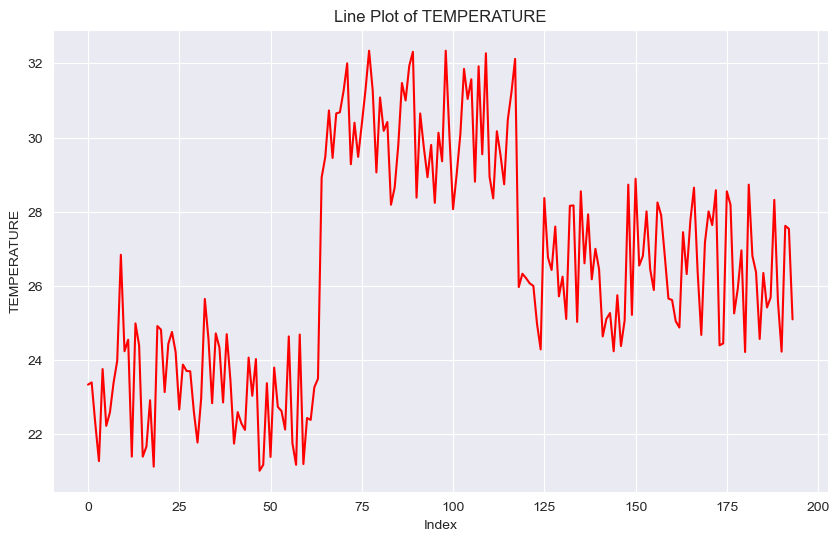

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df_encoded['TEMPERATURE'], color='red')
plt.title('Line Plot of TEMPERATURE')
plt.xlabel('Index')
plt.ylabel('TEMPERATURE')
plt.grid(True)
plt.show()

Box Plot

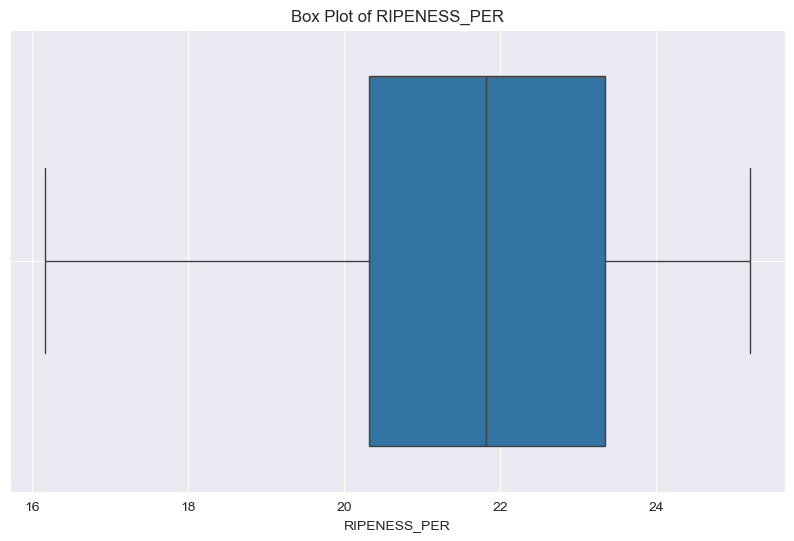

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_encoded['RIPENESS_PER'])
plt.title('Box Plot of RIPENESS_PER')
plt.xlabel('RIPENESS_PER')
plt.grid(True)
plt.show()

Scatter Plot

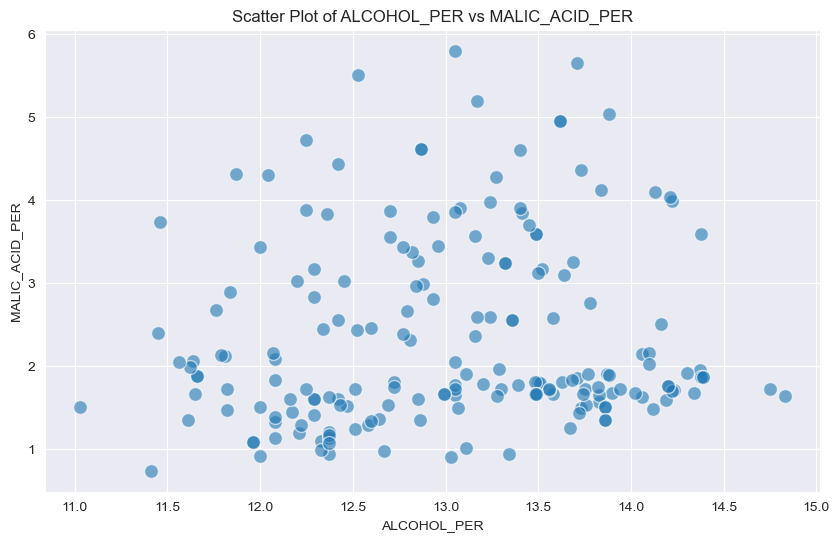

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['ALCOHOL_PER'], df_encoded['MALIC_ACID_PER'], alpha=0.6, edgecolors='w', s=100)
plt.title('Scatter Plot of ALCOHOL_PER vs MALIC_ACID_PER')
plt.xlabel('ALCOHOL_PER')
plt.ylabel('MALIC_ACID_PER')
plt.grid(True)
plt.show()

Histogram

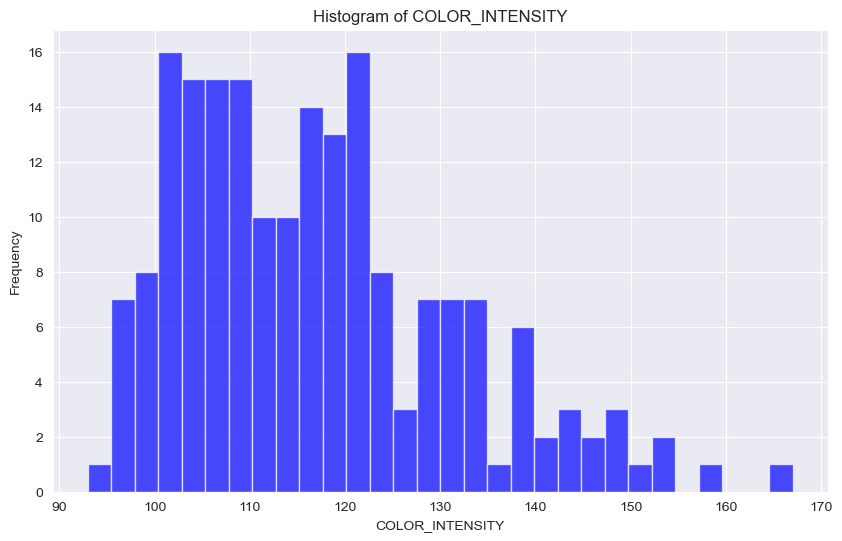

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df_encoded['COLOR_INTENSITY'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of COLOR_INTENSITY')
plt.xlabel('COLOR_INTENSITY')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

HeatMap 

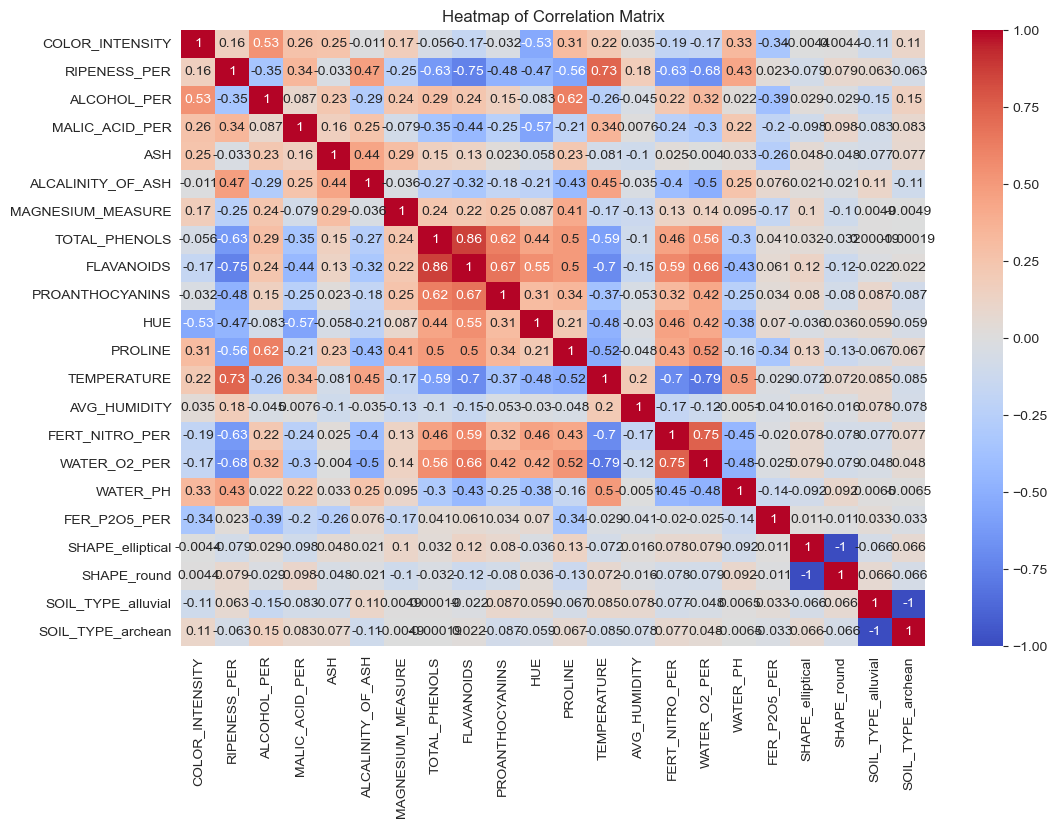

In [23]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

Pair Plot

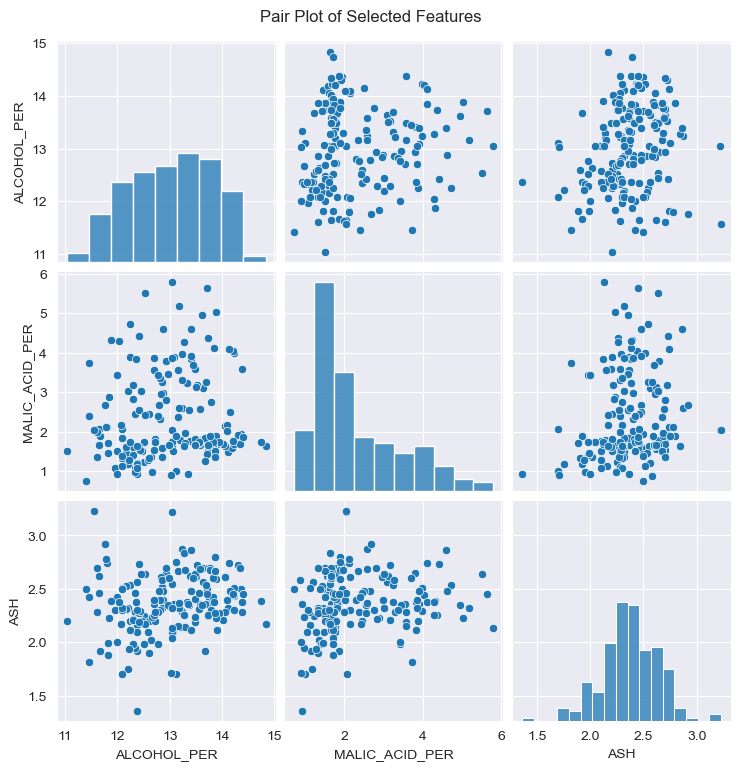

In [24]:
sns.pairplot(df_encoded[['ALCOHOL_PER', 'MALIC_ACID_PER', 'ASH']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

Voilin Plot

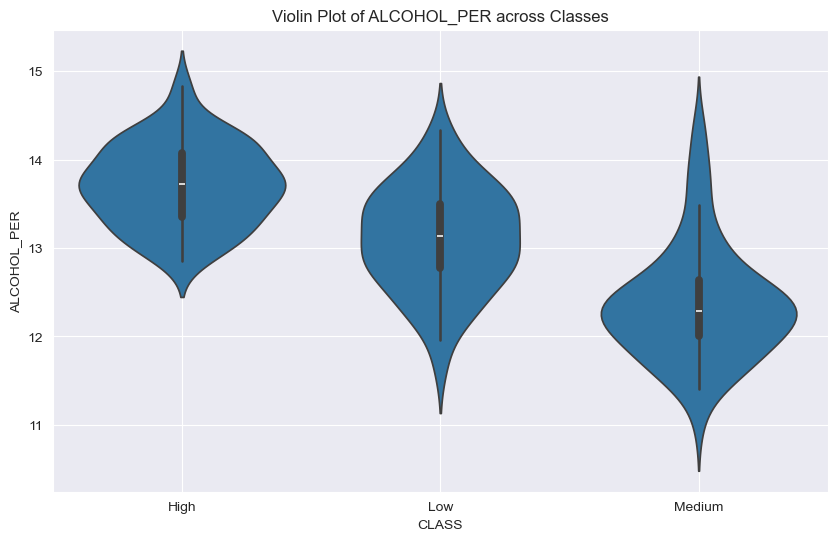

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='CLASS', y='ALCOHOL_PER', data=df_encoded)
plt.title('Violin Plot of ALCOHOL_PER across Classes')
plt.xlabel('CLASS')
plt.ylabel('ALCOHOL_PER')
plt.grid(True)
plt.show()

3D Plot

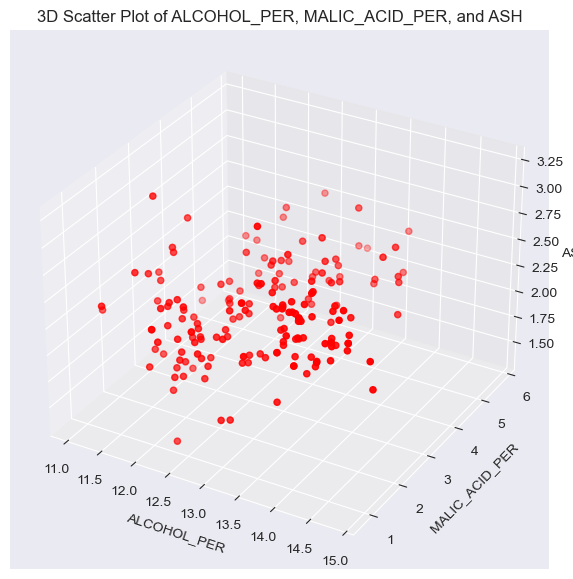

In [26]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_encoded['ALCOHOL_PER'], df_encoded['MALIC_ACID_PER'], df_encoded['ASH'], c='r', marker='o')
ax.set_xlabel('ALCOHOL_PER')
ax.set_ylabel('MALIC_ACID_PER')
ax.set_zlabel('ASH')
plt.title('3D Scatter Plot of ALCOHOL_PER, MALIC_ACID_PER, and ASH')
plt.show()